1.Ferramentas e Bibliotecas
Para desenvolver o dashboard, você precisará de algumas bibliotecas Python:

Pandas: Para manipulação de dados.
Matplotlib/Seaborn: Para visualização de dados.
Dash/Streamlit: Para criar o dashboard interativo.
Você pode instalar essas bibliotecas usando pip

In [2]:
pip install pandas matplotlib seaborn dash

Note: you may need to restart the kernel to use updated packages.


Processamento de Dados
Vamos supor que você tenha um dataset com as seguintes colunas: timestamp, heart_rate, calories_burned, activity_type. Aqui está um exemplo de como carregar e processar esses dados

In [4]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('performance_data.csv')

# Converter a coluna de timestamp para datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Exemplo de cálculo de média de frequência cardíaca por atividade
mean_heart_rate = df.groupby('activity_type')['heart_rate'].mean()
print(mean_heart_rate)

activity_type
Cycling     119.862069
Running     127.307692
Swimming    121.578947
Walking     116.846154
Name: heart_rate, dtype: float64


Visualização de Dados
Agora, vamos criar algumas visualizações básicas

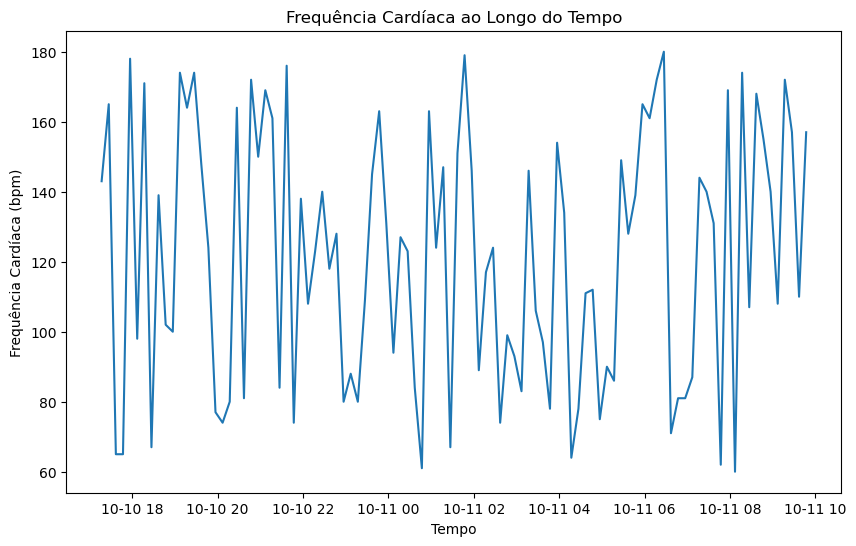

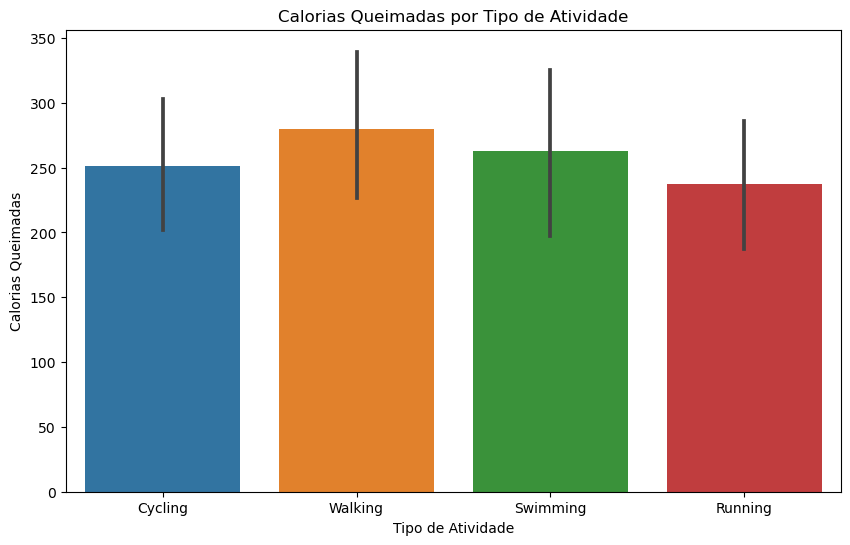

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de linha para frequência cardíaca ao longo do tempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='timestamp', y='heart_rate', data=df)
plt.title('Frequência Cardíaca ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Frequência Cardíaca (bpm)')
plt.show()

# Gráfico de barras para calorias queimadas por tipo de atividade
plt.figure(figsize=(10, 6))
sns.barplot(x='activity_type', y='calories_burned', data=df)
plt.title('Calorias Queimadas por Tipo de Atividade')
plt.xlabel('Tipo de Atividade')
plt.ylabel('Calorias Queimadas')
plt.show()

Criando o Dashboard
Para criar um dashboard interativo, você pode usar o Dash

In [6]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='heart-rate-graph'),
    dcc.Graph(id='calories-burned-graph')
])

@app.callback(
    Output('heart-rate-graph', 'figure'),
    [Input('interval-component', 'n_intervals')]
)
def update_heart_rate_graph(n):
    fig = {
        'data': [
            {'x': df['timestamp'], 'y': df['heart_rate'], 'type': 'line', 'name': 'Heart Rate'}
        ],
        'layout': {
            'title': 'Frequência Cardíaca ao Longo do Tempo'
        }
    }
    return fig

@app.callback(
    Output('calories-burned-graph', 'figure'),
    [Input('interval-component', 'n_intervals')]
)
def update_calories_burned_graph(n):
    fig = {
        'data': [
            {'x': df['activity_type'], 'y': df['calories_burned'], 'type': 'bar', 'name': 'Calories Burned'}
        ],
        'layout': {
            'title': 'Calorias Queimadas por Tipo de Atividade'
        }
    }
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\vedem\AppData\Local\Temp\ipykernel_208\92903189.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\vedem\AppData\Local\Temp\ipykernel_208\92903189.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
